In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the architecture of the neural network
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 59s 59ms/step - loss: 0.1728 - accuracy: 0.9480 - val_loss: 0.0519 - val_accuracy: 0.9830
Epoch 2/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0506 - accuracy: 0.9848 - val_loss: 0.0376 - val_accuracy: 0.9883
Epoch 3/5
938/938 [==============================] - 50s 54ms/step - loss: 0.0358 - accuracy: 0.9888 - val_loss: 0.0310 - val_accuracy: 0.9897
Epoch 4/5
938/938 [==============================] - 51s 55ms/step - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.0270 - val_accuracy: 0.9917
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.0321 - accuracy: 0.9901
Test accuracy: 0.9901000261306763


1/1 [==============================] - 0s 23ms/step


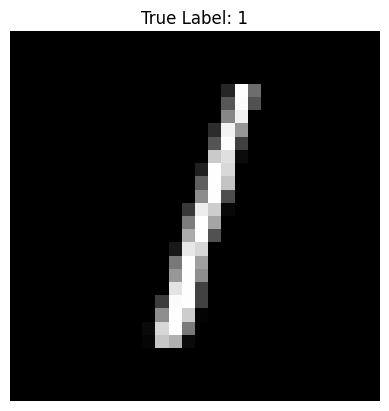

Predicted Label: 1


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Choose an image from the test set
image_index = 2  # Change this to any index you want to test
test_image = test_images[image_index]
true_label = np.argmax(test_labels[image_index])

# Reshape the image to match the input shape of the model
test_image = np.expand_dims(test_image, axis=0)

# Predict the label of the image
predictions = model.predict(test_image)
predicted_label = np.argmax(predictions)

# Display the original image and its true label
plt.imshow(test_images[image_index].reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label}")
plt.axis('off')
plt.show()

# Print the predicted label
print(f"Predicted Label: {predicted_label}")
